In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


# Модуль 1

## 1.1 Подготовка обучающей  и тестовой выборок

### Загрузка данных

In [3]:
# Импорт необходимых библиотек:
import numpy as np 
import pandas as pd 
import joblib
from sklearn.feature_extraction.text import CountVectorizer
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('data/train_ses.csv',index_col='session_id')
test_df = pd.read_csv('data/test_ses.csv',index_col='session_id')

In [5]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [6]:
train_df.shape

(253561, 21)


Видим, что в данном наборе 253561 сессии и 22 признак, включая целевой атрибут

### Загрузка и преаброзование словаря 

In [7]:
site_dict= joblib.load('data/site.pkl')


In [8]:
site_dict_df = pd.DataFrame(data= site_dict.values(),index=site_dict.keys())
site_dict_df.head()

,0
www.abmecatronique.com,25075
groups.live.com,13997
majeureliguefootball.wordpress.com,42436
cdt46.media.tourinsoft.eu,30911
www.hdwallpapers.eu,8104


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 42.6+ MB


Из полученной информации выше делаем вывод о том, что временные атрибуты представленны как object, преоброзуем их в datatime

### Приведение данных к приемлемомму формату

Пропущенные значения можем заменить нулями, что будет означать, что в это время никакой сайт не был посещен.

In [10]:
sites = ['site%s'% i for i in range(1,11)]
train_df[sites] = train_df[sites].fillna(0).astype('int64')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     253561 non-null int64
time2     250098 non-null object
site3     253561 non-null int64
time3     246919 non-null object
site4     253561 non-null int64
time4     244321 non-null object
site5     253561 non-null int64
time5     241829 non-null object
site6     253561 non-null int64
time6     239495 non-null object
site7     253561 non-null int64
time7     237297 non-null object
site8     253561 non-null int64
time8     235224 non-null object
site9     253561 non-null int64
time9     233084 non-null object
site10    253561 non-null int64
time10    231052 non-null object
target    253561 non-null int64
dtypes: int64(11), object(10)
memory usage: 42.6+ MB


In [12]:
times = ['time%s'% i for i in range(1,11)]
train_df[times]=train_df[times].fillna(0).apply(pd.to_datetime)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null datetime64[ns]
site2     253561 non-null int64
time2     253561 non-null datetime64[ns]
site3     253561 non-null int64
time3     253561 non-null datetime64[ns]
site4     253561 non-null int64
time4     253561 non-null datetime64[ns]
site5     253561 non-null int64
time5     253561 non-null datetime64[ns]
site6     253561 non-null int64
time6     253561 non-null datetime64[ns]
site7     253561 non-null int64
time7     253561 non-null datetime64[ns]
site8     253561 non-null int64
time8     253561 non-null datetime64[ns]
site9     253561 non-null int64
time9     253561 non-null datetime64[ns]
site10    253561 non-null int64
time10    253561 non-null datetime64[ns]
target    253561 non-null int64
dtypes: datetime64[ns](10), int64(11)
memory usage: 42.6 MB


## 1.2 Работа с разреженным форматом данных

### Создание частотного словаря

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import csv

Создадим набор, содержащий только сайты

In [64]:
full_sites = train_df[sites]
full_sites.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178


In [31]:
full_sites.to_csv('data_sessions_text.txt', 
                                 sep=' ', index=None, header=None)

In [32]:
cv = CountVectorizer(ngram_range=(1,1), max_features=50000)
with open('data_sessions_text.txt') as inp_file:
    data = cv.fit_transform(inp_file)

In [33]:
joblib.dump(data, 'Data/data.pkl')

['Data/data.pkl']

## 1.3 Визуальный анализ данных


Построим распределения. Посмотрим распределение данных нашей целевой переменной- target

In [65]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

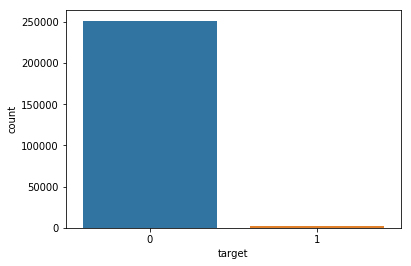

In [66]:
sns.countplot(train_df['target'])

In [67]:
train_time = train_df[times]

In [68]:
train_time.head()

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
session_id,,,,,,,,,,
1,2014-02-20 10:02:45,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00
2,2014-02-22 11:19:50,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15,2014-02-22 11:20:16
3,2013-12-16 16:40:17,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22,2013-12-16 16:40:24
4,2014-03-28 10:52:12,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12,2014-03-28 10:56:42
5,2014-02-28 10:53:05,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06,2014-02-28 10:57:11


## 1.4 Конструирование признаков (Feature Engineering)

Вычислим время начала каждой сессии

In [69]:
session_start_hour = train_time['time1'].apply(lambda ts: ts.hour).values

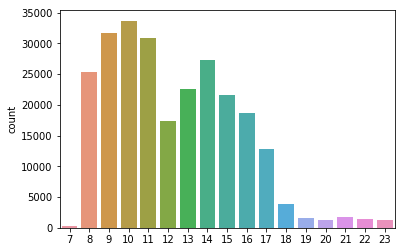

In [70]:
sns.countplot(session_start_hour)

Text(0.5, 0, 'Session start hour')

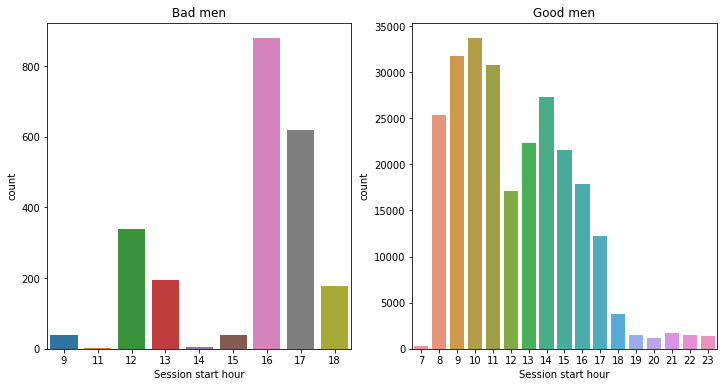

In [71]:
plt.subplots(1, 2, figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.countplot(session_start_hour[y_train == 1])
plt.title('Bad men')
plt.xlabel('Session start hour')

plt.subplot(1, 2, 2)
sns.countplot(session_start_hour[y_train == 0])
plt.title('Good men')
plt.xlabel('Session start hour')

Видим, что время начала сессии для обычных пользователей с 8:00 утра до 17:00, для мошенников это обеденные часы и вечер

Создадим дополнительные признаки: утро, день, вечер, ночь

In [72]:
morning = ((session_start_hour >= 7 ) & (session_start_hour<=11)).astype('int')
day = ((session_start_hour >= 12 ) & (session_start_hour<= 18)).astype('int')
evening = ((session_start_hour >= 19 ) & (session_start_hour<=23)).astype('int')
night = ((session_start_hour >= 0 ) & (session_start_hour<=6)).astype('int')

In [73]:
train_time['morning'] = morning
train_time['day'] = day
train_time['evening'] = evening
train_time['night'] = night

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [74]:
train_time['target'] = train_df['target']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


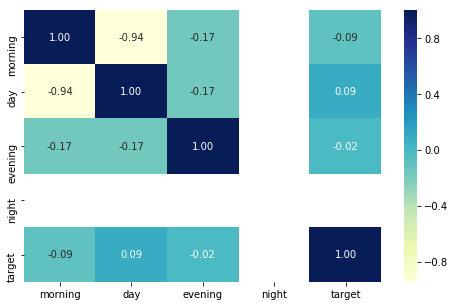

In [75]:
corr = train_time.corr('spearman') 
plt.figure(figsize = ( 8, 5 )) 
sns.heatmap(corr,annot=True,fmt='.2f',cmap="YlGnBu")

Исходя из полученного изображения, видим, что атрибут ночь необходимо исключить из набора данных

In [60]:
train_time=train_time.drop('night',axis=1)

Сохраним полученный набор

In [84]:
train_time.to_csv('data/time_train_df.csv')

In [87]:
full_sites['morning'] = train_time['morning']
full_sites['day'] = train_time['day']
full_sites['evening'] = train_time['evening']
full_sites['target']=train_time['target']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [89]:
full_sites.to_csv('data/full_train_df.csv')